In [21]:
import simtool

In [22]:
a1 , a2 , e , c , K , a = 0.088 , 0.020 , 1, 0.96, 0.034, 0.086
params = [a1, a2, e, c, K, a]
param_names = ["a1", "a2", "e", "c", "K", "a"]
t_max = 250 #days
x0, y0 = 0.12, 0.91 #
#x0, y0 = 0.25, 0.25
state_0 = [x0, y0]
data = simtool.data_gen(params, t_max, state_0, func_rep = 'holling1')

nbpoint = 25
noise_intensity = 0.02
noise_seed = 123
lr = 0.001
nb_iter_train = 10000

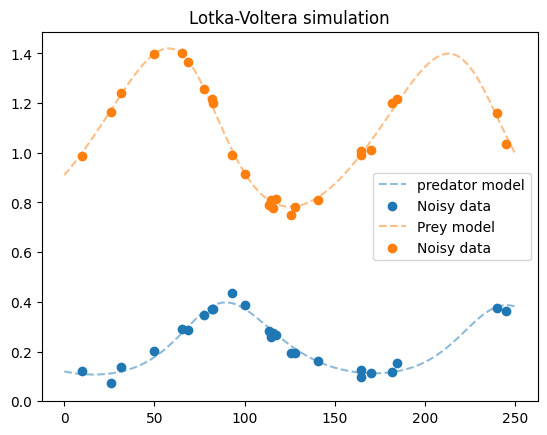

In [23]:
data.get_data(nbpoint=nbpoint, noise_intensity=noise_intensity, plot_data=True,noise_seed = noise_seed)

In [24]:
model = simtool.pinn(data)
model.get_train_data()

In [25]:
#first step of the training cf l'article
bc_weights = [5,5]
data_weights = [0.1,0.1] #car données tres bruitées
poids = [0] * 2 + bc_weights + data_weights
model.compile_model(lr=lr,poids = poids)
model.train(5000)

Compiling model...
Building feed-forward neural network...
'build' took 0.048455 s

'compile' took 0.287290 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [0.00e+00, 0.00e+00, 7.20e-02, 4.14e+00, 1.50e-01, 1.25e+00]    [0.00e+00, 0.00e+00, 7.20e-02, 4.14e+00, 1.50e-01, 1.25e+00]    []  
1000      [0.00e+00, 0.00e+00, 5.76e-10, 2.70e-11, 1.93e-04, 8.29e-04]    [0.00e+00, 0.00e+00, 5.76e-10, 2.70e-11, 1.93e-04, 8.29e-04]    []  
2000      [0.00e+00, 0.00e+00, 2.01e-07, 2.12e-08, 3.19e-02, 7.02e-03]    [0.00e+00, 0.00e+00, 2.01e-07, 2.12e-08, 3.19e-02, 7.02e-03]    []  
3000      [0.00e+00, 0.00e+00, 1.06e-10, 1.31e-10, 8.15e-05, 5.16e-04]    [0.00e+00, 0.00e+00, 1.06e-10, 1.31e-10, 8.15e-05, 5.16e-04]    []  
4000      [0.00e+00, 0.00e+00, 5.09e-09, 5.37e-11, 1.00e-04, 4.51e-04]    [0.00e+00, 0.00e+00, 5.09e-09, 5.37e-11, 1.00e-04, 4.51e-04]    []  
5000 

In [26]:
print(model.time_last_train_in_sec)

8.168040037155151


In [27]:
dp = simtool.displayer(model)

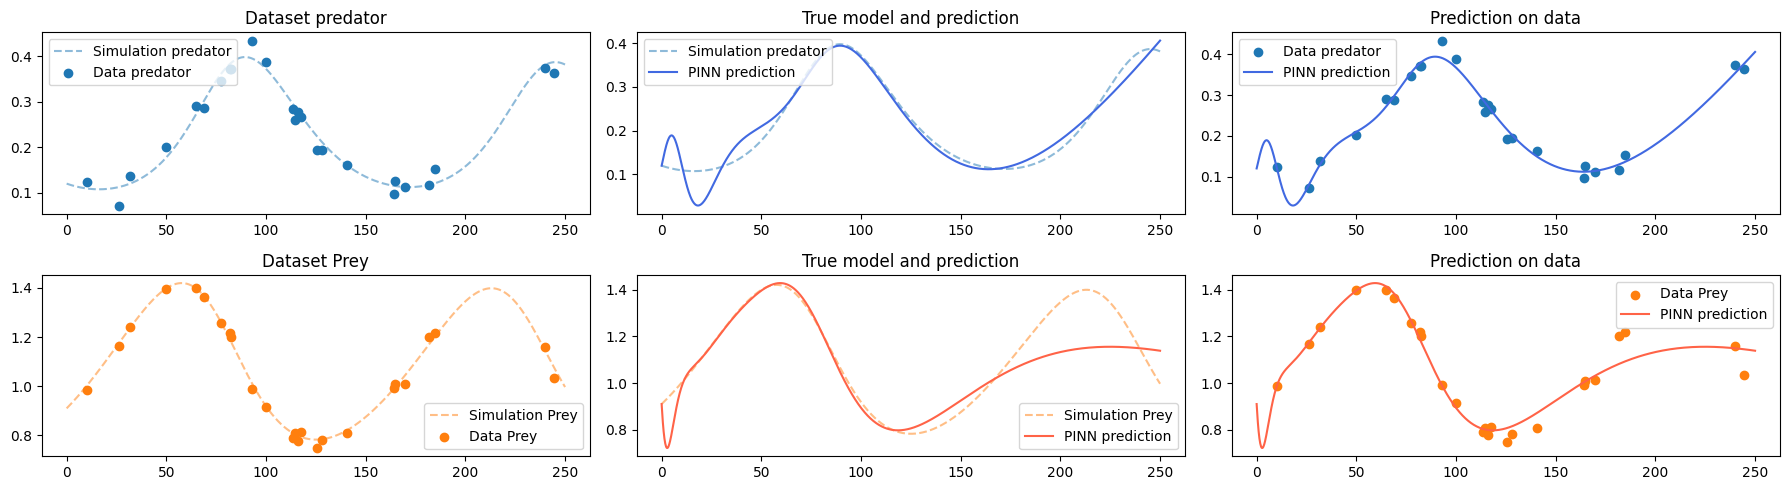

In [28]:
dp.basic_plot()

In [29]:
pde_weights = [10,10] #car données tres bruitées
poids2 = pde_weights + bc_weights + data_weights
model.compile_model(lr=lr,poids=poids2)

Compiling model...
Building feed-forward neural network...
'build' took 0.019553 s

'compile' took 0.254408 s



## Seconde partie du training

In [30]:
model.train(100000)

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [1.06e+01, 1.71e+01, 7.20e-02, 4.14e+00, 4.33e+00, 3.45e-01]    [1.06e+01, 1.71e+01, 7.20e-02, 4.14e+00, 4.33e+00, 3.45e-01]    []  
1000      [1.54e-04, 3.95e-03, 2.09e-09, 4.89e-10, 8.11e-04, 1.22e-03]    [1.54e-04, 3.95e-03, 2.09e-09, 4.89e-10, 8.11e-04, 1.22e-03]    []  
2000      [7.37e-05, 4.36e-04, 1.14e-10, 4.32e-10, 2.68e-04, 8.87e-04]    [7.37e-05, 4.36e-04, 1.14e-10, 4.32e-10, 2.68e-04, 8.87e-04]    []  
3000      [6.20e-05, 1.40e-04, 1.80e-11, 2.35e-10, 1.63e-04, 7.16e-04]    [6.20e-05, 1.40e-04, 1.80e-11, 2.35e-10, 1.63e-04, 7.16e-04]    []  
4000      [6.36e-05, 1.39e-04, 1.28e-11, 5.76e-12, 1.27e-04, 6.42e-04]    [6.36e-05, 1.39e-04, 1.28e-11, 5.76e-12, 1.27e-04, 6.42e-04]    []  
5000      [7.10e-05, 1.42e-04, 2.14e-10, 1.73e-09, 7.68e-05, 7.65e-04]    [7.10e-05, 1.42e-04, 2.14e-10, 1.73e-09, 7

In [31]:
print(model.time_last_train_in_sec)

158.0762119293213


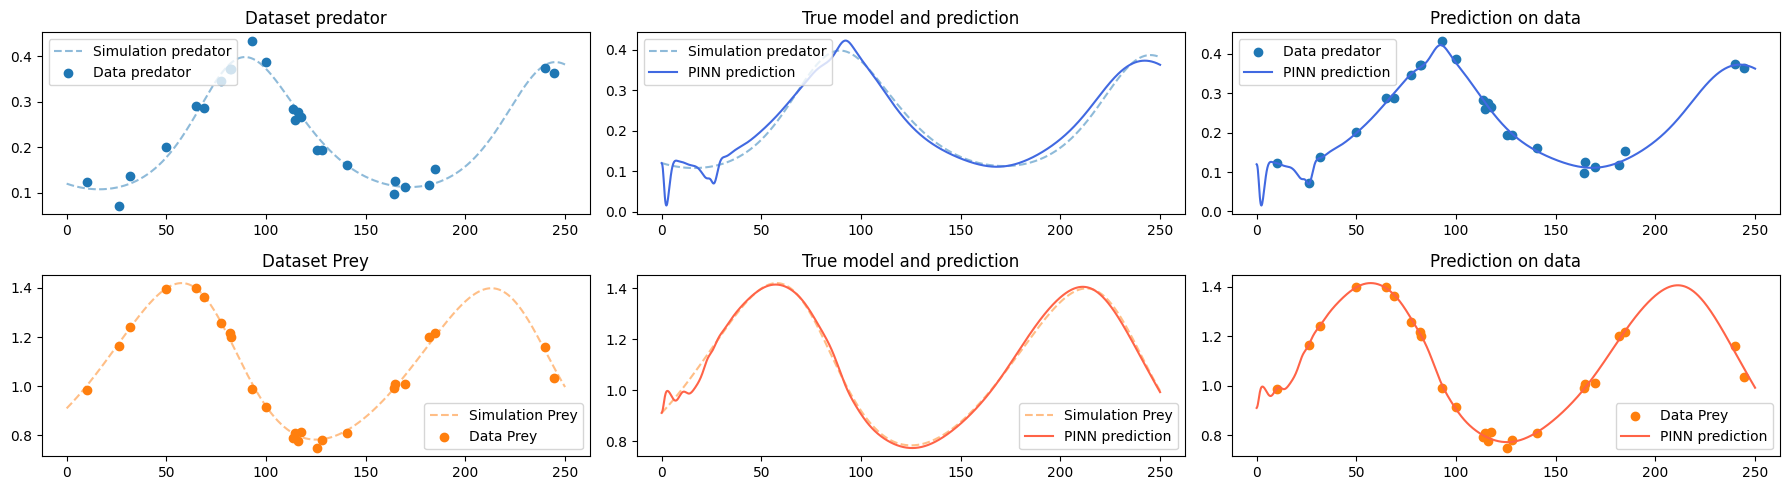

In [32]:
dp = simtool.displayer(model)
dp.basic_plot()

## Scipy model pour comparaison

In [33]:
sp_model = simtool.model_scipy(data)

In [34]:
sp_model.get_train_data(nbpoint=nbpoint, noise_intensity=noise_intensity)

In [35]:
dsp = simtool.displayer(sp_model)

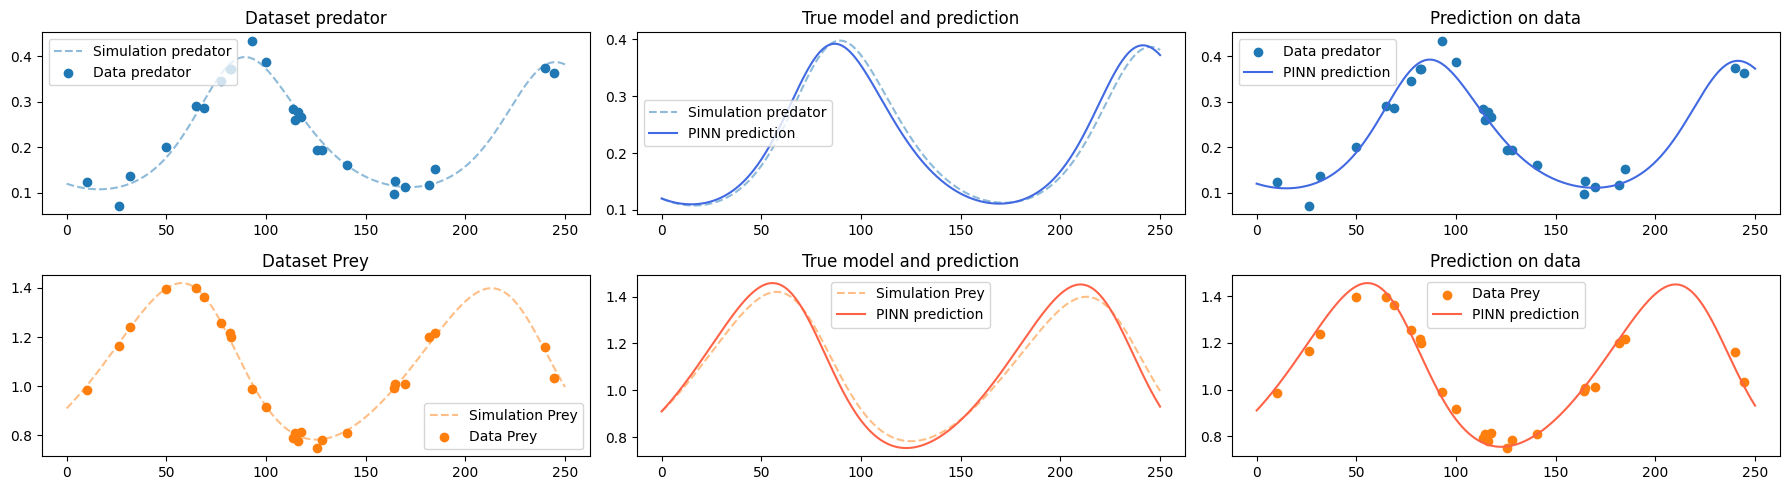

In [36]:
dsp.basic_plot()

## Training loss evolution

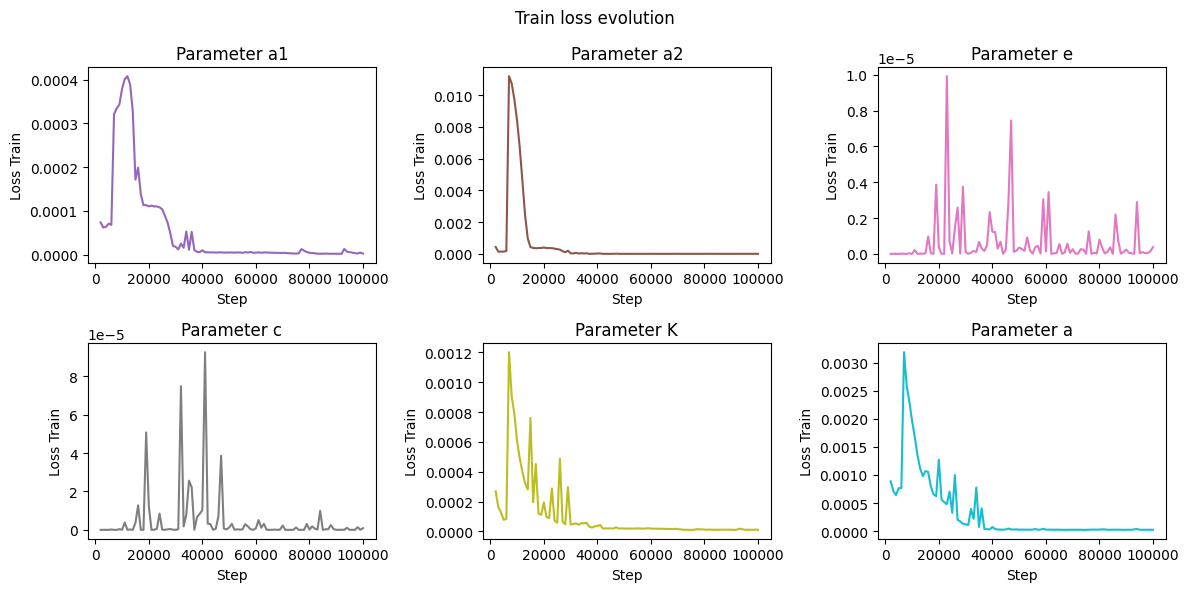

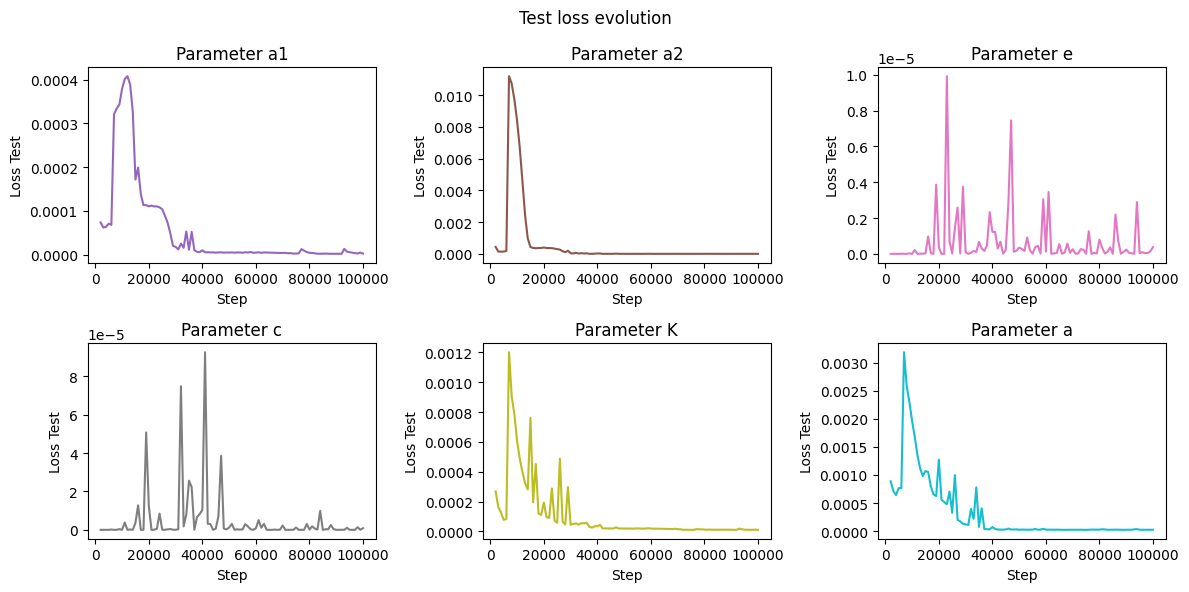

In [37]:
import matplotlib.pyplot as plt
import numpy as np

np.all(model.losshistory.loss_train) == np.all(model.losshistory.loss_test)

param_names = ["a1", "a2", "e", "c", "K", "a"]
default_col_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, axs = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle("Train loss evolution")
for k in range(np.shape(model.losshistory.loss_train)[1]):
    axs[int(k>2),k%3].plot(model.losshistory.steps[2:], 
                             np.array(model.losshistory.loss_train[2:])[:, k],
                             color=default_col_pal[k+4])
    axs[int(k>2),k%3].set_title("Parameter "+param_names[k])
    axs[int(k>2),k%3].set_ylabel('Loss Train')
    axs[int(k>2),k%3].set_xlabel('Step')
plt.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle("Test loss evolution")
for k in range(np.shape(model.losshistory.loss_test)[1]):
    axs[int(k>2),k%3].plot(model.losshistory.steps[2:], 
                             np.array(model.losshistory.loss_test[2:])[:, k],
                             color=default_col_pal[k+4])
    axs[int(k>2),k%3].set_title("Parameter "+param_names[k])
    axs[int(k>2),k%3].set_ylabel('Loss Test')
    axs[int(k>2),k%3].set_xlabel('Step')
plt.tight_layout()

## GIF on training

In [38]:
from scipy.integrate import odeint

t_max_hist = t_max
state0_hist = state_0

def lv_model_holling1_hist(state, t, param_lv_hol1):
    a1, a2, e, c, K, a = param_lv_hol1
    x1, x2 = state
    # HOLLING 1
    frep_predateur = a * x2
    dx1_dt = -a1*x1 + e*c*x1*frep_predateur
    dx2_dt = a2*x2*(1-K*x2) - x1*frep_predateur
    return np.array([dx1_dt, dx2_dt])
    
def simulate(state0_hist, t_max_hist, param_lv_hol1, nb_p_t=15000):
    t_simu = np.linspace(0, t_max_hist, nb_p_t)
    simulation = odeint(lv_model_holling1_hist, state0_hist, t_simu, args=(param_lv_hol1,), atol=1e-8, rtol=1e-11)
    return t_simu, simulation

In [41]:
import numpy as np
import re

file_path = "20240122_225939-train_param.dat"
param_names_hist = ["a1", "a2", "e", "c", "K", "a", "S", "b"]

steps_hist, param_hist = [], []
with open(file_path, 'r') as file:
    for line in file:
        steps_hist.append(int(line.split(' ')[0]))
        param_hist.append(
            [float(value) for value in 
             re.search(r'\[(.*?)\]', line).group(1).split(', ')]
        )
steps_hist = np.array(steps_hist)
param_hist = np.array(param_hist)

# print(steps_hist)
# print(param_hist)
print(np.shape(param_hist))
# print(param_hist[3, :6])

all_t_simu, all_simulations = [], []
for k in range(np.shape(param_hist)[0]):
    param_lv_hol1 = param_hist[k, :6]
    t_simu, simulation = simulate(state0_hist, t_max_hist, param_lv_hol1, nb_p_t=15000)
    all_t_simu.append(t_simu)
    all_simulations.append(simulation)


(11, 8)


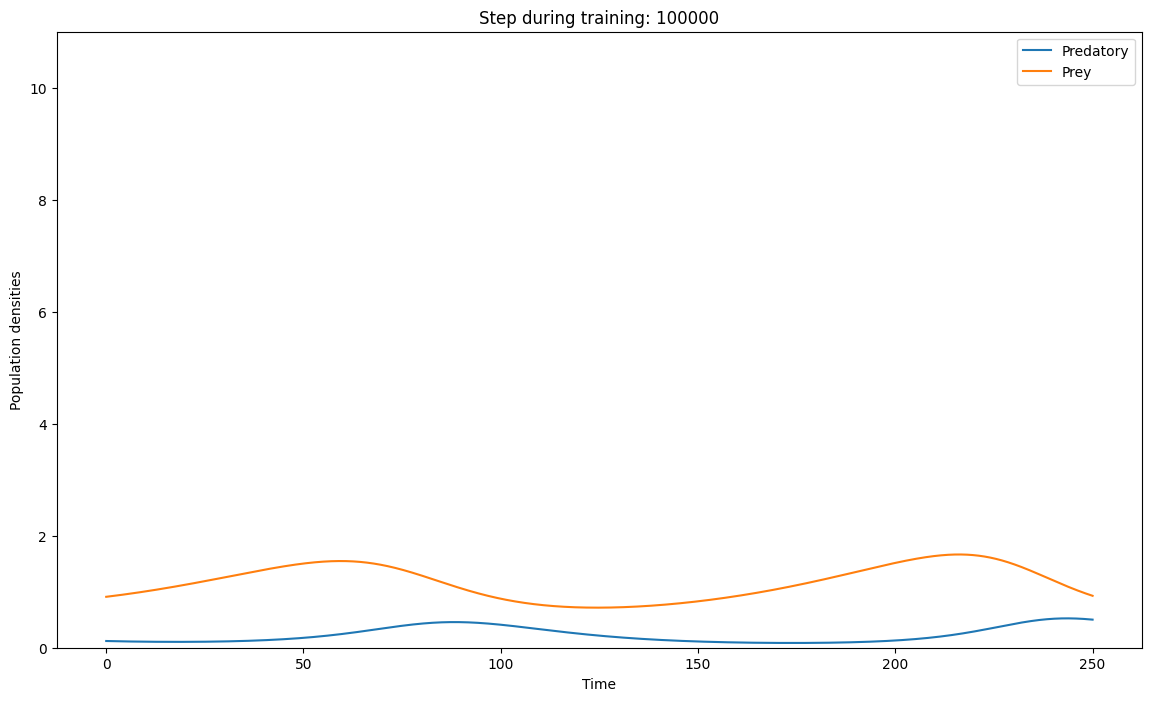

In [42]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

all_t_simu_with_rep = [all_t_simu[0]]*10 + all_t_simu + [all_t_simu[-1]]*20
all_simulations_with_rep = [all_simulations[0]]*10 + all_simulations + [all_simulations[-1]]*20
steps_hist_with_rep = [steps_hist[0]]*10 + list(steps_hist) + [steps_hist[-1]]*20
global_y_max = max([np.max(sim) for sim in all_simulations])

fig, ax = plt.subplots(figsize=(14, 8))
def update(frame):
    ax.clear()  # Clear the previous plot
    t_simu = all_t_simu_with_rep[frame]
    simulation = all_simulations_with_rep[frame]
    ax.plot(t_simu, simulation, label=["Predator", "Prey"])
    ax.set_xlabel('Time')
    ax.set_ylabel('Population densities')
    ax.set_ylim((0, global_y_max*1.05))
    ax.legend(loc='upper right')
    ax.set_title(f'Step during training: {steps_hist_with_rep[frame]}')

animation = FuncAnimation(fig, update, frames=len(all_t_simu_with_rep), interval=100)  # 50 milliseconds between frames
animation.save('evolution_animation.gif', writer='pillow', fps=1/0.1)  # 0.1 seconds per frame

plt.show()


In [43]:
a1 , a2 , e , c , K , a = 8.5e-2 , 1.79e-2 , 9.3e-1, 9.3e-1, -1.36e-1, 8.95e-2
params = [a1, a2, e, c, K, a]
param_names = ["a1", "a2", "e", "c", "K", "a"]
t_max = 250 #days
x0, y0 = 0.12, 0.91 #
#x0, y0 = 0.25, 0.25
state_0 = [x0, y0]
data = simtool.data_gen(params, t_max, state_0, func_rep = 'holling1')

nbpoint = 25
noise_intensity = 0.02
noise_seed = 123
lr = 0.001
nb_iter_train = 10000

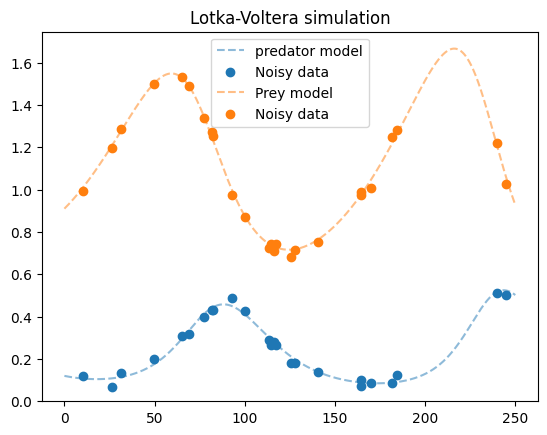

In [44]:
data.get_data(nbpoint=nbpoint, noise_intensity=noise_intensity, plot_data=True,noise_seed = noise_seed)